# C.7.7 XGBoost 모델

In [ ]:
# 아래 두 줄 코딩 즉 xgboost와 lightgbm 설치 구문 중 하나라도 주피터 노트북에서 설치에러 발생시에는
# 구글 코랩에서 이 ipynb 파일을 열고 실행할 것을 추천함

In [ ]:
# 그 때 2014DC2.csv 파일을 구글 드라이브에 업로딩하고 이를 구글 코랩에서 불러오기 위해서는 
# 책 본문 4.7.6의 텐서플로 케라스 절의 초반 안내 사항 준수 필요

In [1]:
pip install xgboost

     |████████████████████████████████| 1.3MB 656kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2014DC2.csv') 
df.shape

(12417, 75)

In [2]:
data = df.drop(['EBizSystem2'], axis=1)   # 타겟변수를 제외한 변수를 data에 저장
target = df['EBizSystem2']                # 타겟변수만 target 데이터프레임에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# interval 변수의 null value를 평균(mean)으로 impute. 
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy = 'mean')  
X_train2= imp.fit_transform(X_train) 
X_test2= imp.fit_transform(X_test)   # X_train과 and X_test 둘 다 imputation 적용해야 함에 유의

In [16]:
# 기본 XGBClassifer 모델
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train2, y_train)
pred = xgb.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료 투입해서 타겟변수 예측값 생성.

print ("XGB Accuracy on training set:{:.5f}".format(xgb.score(X_train2, y_train))) 
print ("XGB Accuracy on test set:{:.5f}".format(accuracy_score(pred, y_test))) 

C:\Users\jason\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy on training set:0.99887
XGB Accuracy on test set:0.70591


In [7]:
# 기본 XGBClassifier 모델
xgb = XGBClassifier(random_state=0)

In [9]:
# XGBClassifier 최적화

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

xgb = XGBClassifier(random_state=0)

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [10, 11],
              'min_child_weight' : [4],
              'n_estimators': [200, 300],
              'subsample': [0.7, 0.8]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring='accuracy',
                        cv = cross_validation,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train2, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\jason\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_ch...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                           

In [10]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.8}


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model = xgb_grid.best_estimator_
pred = model.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72604
ROC AUC on test set:0.78365


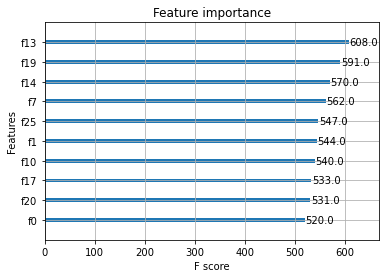

In [14]:
from xgboost import plot_importance

plot_importance(model, max_num_features=10);

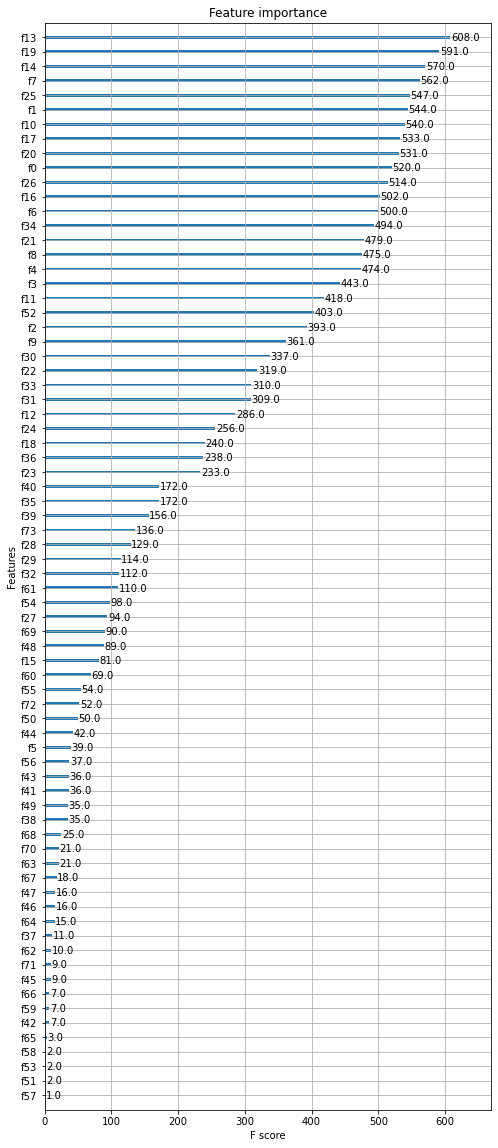

In [15]:
# 참조 코딩
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 20))
plot_importance(model, ax=ax);

In [16]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(model.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)  
dft1

,Feature_importances
Cost1,0.040
Outsourcing1,0.030
EBizSystem10,0.030
ParentCompany1,0.027
Compensation4,0.023
...,...
Compensation1,0.009
NewEntry3,0.008
Franchise1,0.008
EBizSystem4,0.005


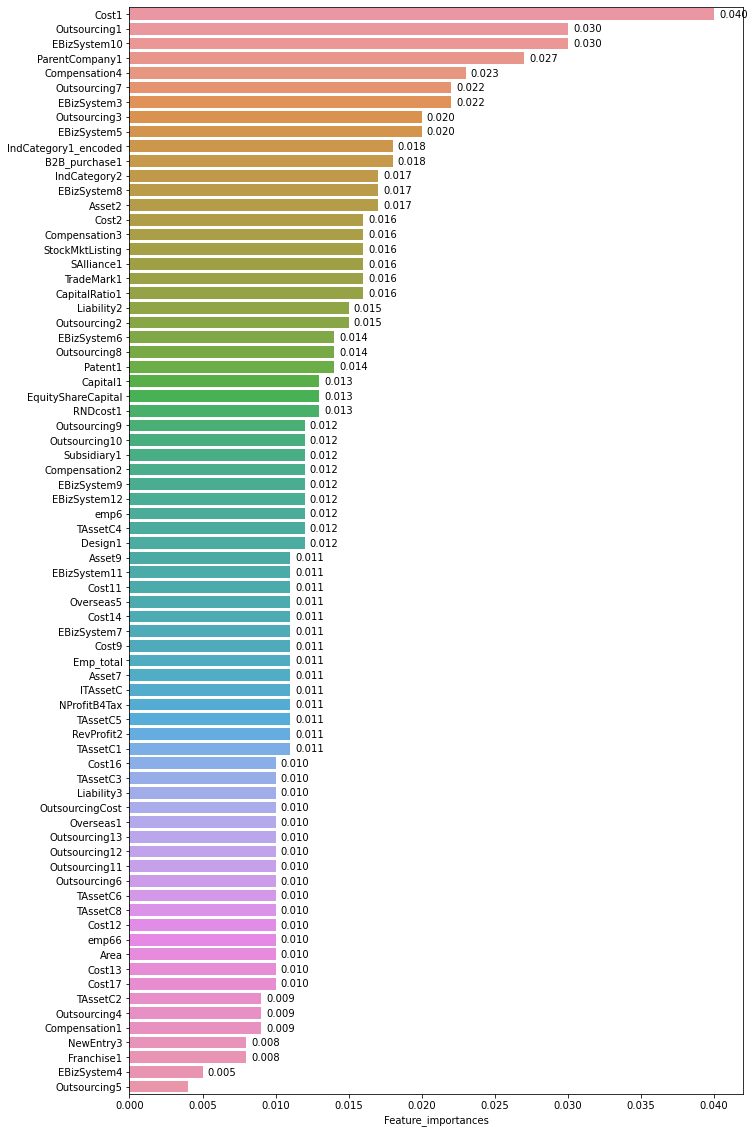

In [17]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

# C.7.8 LGBMClassifier모델

In [19]:
# 기본 lGBMClassifier 모델
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train2, y_train)
pred = lgb.predict(X_test2)  # 학습된 Classifier로 테스트 데이터셋 자료를 투입해서 타겟변수 예측값 생성

print ("Accuracy on training set:{:.5f}".format(lgb.score(X_train2, y_train))) 
print ("Accuracy on test set:{:.5f}".format(accuracy_score(pred, y_test))) 

Accuracy on training set:0.92703
Accuracy on test set:0.72153


In [20]:
# 기본 lGBMClassifier 모델
from lightgbm import LGBMRegressor
lgb = LGBMClassifier(random_state=0)

In [21]:
# LGBMClassifier 최적화

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정합니다.
cross_validation = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

lgb = LGBMClassifier(random_state=0)

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [10],
              'min_child_weight' : [2, 4],
              'n_estimators': [200, 300],
              'subsample': [0.4, 0.5]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring='accuracy',
                        cv = cross_validation,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train2, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=LGBMClassifier(random_state=0), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [10], 'min_child_weight': [2, 4],
                         'n_estimators': [200, 300], 'subsample': [0.4, 0.5]},
             scoring='accuracy', verbose=True)

In [22]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 2, 'n_estimators': 200, 'subsample': 0.4}


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test2)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test2)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.72878
ROC AUC on test set:0.78983


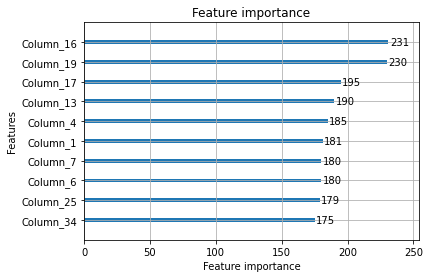

In [24]:
from lightgbm import plot_importance

plot_importance(model, max_num_features=10);

In [25]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(model.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False) 
dft1

,Feature_importances
Emp_total,231
Liability2,230
EquityShareCapital,195
Cost2,190
Capital1,185
...,...
Outsourcing5,3
NewEntry3,2
Outsourcing4,1
Outsourcing12,0


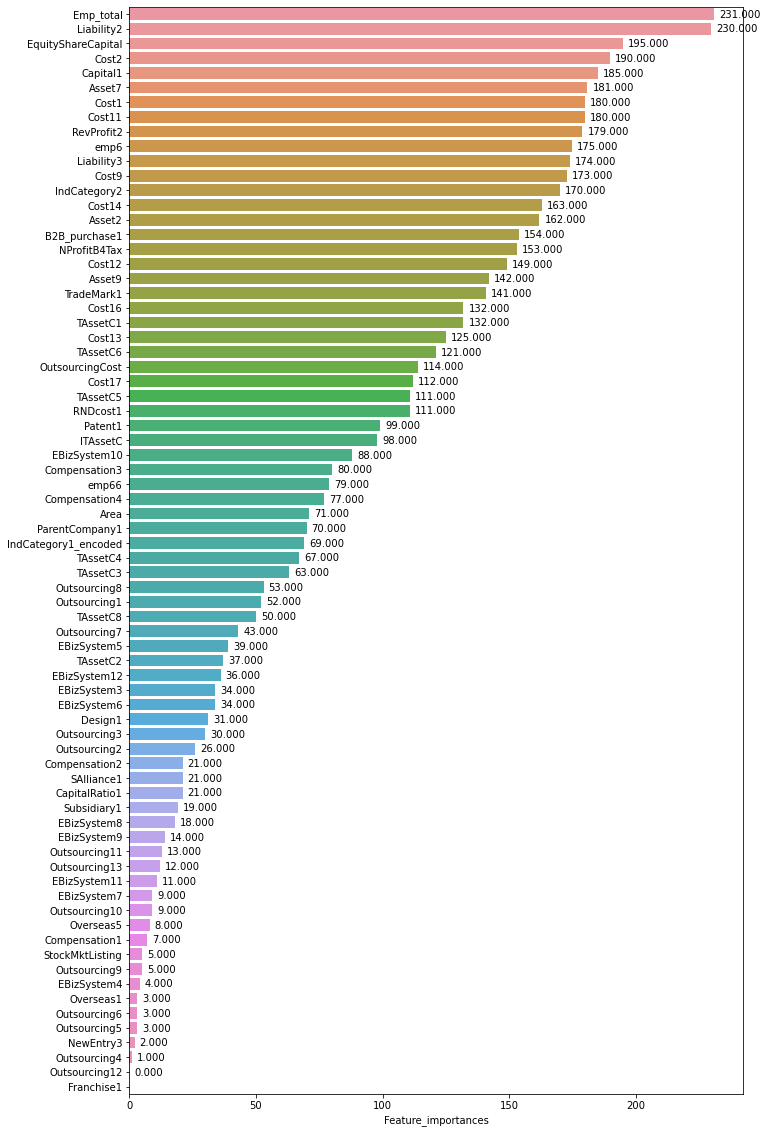

In [26]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 20))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')